# Búsqueda Grid para encontrar el mejor modelo de ML y sus parámetros

In [1]:
#Lectura de la base de datos
import pandas as pd

#Preprocesamiento de los datos
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Búsqueda Grid
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

#Modelos de ML
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import naive_bayes
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

#Construcción de la matriz de confusión
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Almacenamiento del modelo
import pickle

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [4]:
#Lectura del fichero de datos CSV. Separación por ; e ignorando el espacio inicial
data = pd.read_csv('database_speech.csv', sep = ';', skipinitialspace = True)

#Eliminacion de fases
#data = data.drop(data[data['Phase']==8].index)

#Muestra de datos cargados (10)
data.head(10)

,URL,Video,Transcription,Phase,chunk
0,https://www.youtube.com/watch?v=amreUFtw6Ks,1,la primera incisión es de 10 milímetros en el ...,1,20
1,https://www.youtube.com/watch?v=amreUFtw6Ks,1,por ahí se mete la cámara.,1,21
2,https://www.youtube.com/watch?v=amreUFtw6Ks,1,luego se necesitan otras tres para los instrum...,1,22
3,https://www.youtube.com/watch?v=amreUFtw6Ks,1,una aquí de 10 milímetros y otras dos pequeñit...,1,23
4,https://www.youtube.com/watch?v=amreUFtw6Ks,1,"mira, ahí están metiendo uno de los trocares p...",1,9000
5,https://www.youtube.com/watch?v=amreUFtw6Ks,1,"eso lindo que está ahí rosadito, como rojito, ...",8,62
6,https://www.youtube.com/watch?v=amreUFtw6Ks,1,"eso que está cogiendo ahí con la pinza, esa es...",8,8000
7,https://www.youtube.com/watch?v=amreUFtw6Ks,1,ahí metieron una gasita para poder limpiar y p...,1,7000
8,https://www.youtube.com/watch?v=amreUFtw6Ks,1,ay espérate y verás que ahora te la sacan. ahí...,1,6000
9,https://www.youtube.com/watch?v=amreUFtw6Ks,1,"bueno, para que podamos ver todo lo que estamo...",1,404


In [5]:
#Inicialización de los métodos de sobremuestreo
#ROS
ros = RandomOverSampler()
#SMOTE
smote = SMOTE()

#Inicialización de los vectores de extracción de características
#CountVectorizer. Como máximo 400 características, palabras de parada definidas y ajuste a las transcripciones
vectCV = CountVectorizer(max_features = 400, stop_words = ['a', 'aca','acá', 'ahi','ahí', 'ajena', 'ajeno', 'ajenas', 'ajenos', 'al', 'algo', 'algun','algún', 'alguna', 'alguno', 'algunas', 'algunos', 'alla','allá','allí', 'alli', 'ambos', 'ante', 'antes', 'aquel', 'aquella', 'aquello', 'aquellas', 'aquellos', 'aqui','aquí', 'arriba', 'asi','así', 'atras', 'aun', 'aunque', 'bajo', 'bastante', 'bien', 'cabe', 'cada', 'casi', 'cierto', 'cierta', 'ciertos', 'ciertas', 'como', 'con', 'conmigo', 'conseguimos', 'conseguir', 'consigo', 'consigue', 'consiguen', 'consigues', 'contigo', 'contra', 'cual', 'cuales', 'cualquier', 'cualquiera', 'cualquieras', 'cuan', 'cuando', 'cuanto', 'cuanta', 'cuantos', 'cuantas', 'de', 'dejar', 'del', 'demas','demás', 'demasiada', 'demasiado', 'demasiadas', 'demasiados', 'dentro', 'desde', 'donde', 'dos', 'el', 'él','ella', 'ello', 'ellas', 'ellos', 'empleais','empleáis', 'emplean', 'emplear', 'empleas', 'empleo', 'en', 'encima', 'entonces', 'entre', 'era', 'eras', 'eramos', 'eran', 'eres', 'es', 'esa', 'ese', 'eso', 'esas', 'eses', 'esos', 'esta', 'estas', 'estaba', 'estado', 'estais','estáis', 'estamos', 'estan', 'estar', 'este','están', 'esto', 'estos', 'estes', 'estoy', 'etc', 'fin', 'fue', 'fueron', 'fui', 'fuimos', 'gueno', 'ha', 'hace', 'haces', 'haceis','hacéis', 'hacemos', 'hacen', 'hacer', 'hacia', 'hago', 'hasta', 'incluso', 'intenta', 'intentas', 'intentais', 'intentáis', 'intentamos', 'intentan', 'intentar', 'intento', 'ir', 'jamas','jamás', 'junto', 'juntos', 'la', 'lo', 'las', 'los', 'largo', 'mas','más', 'me', 'menos', 'mi', 'mis', 'mia', 'mias','mías', 'mía', 'mientras', 'mio', 'mios','míos', 'mío', 'misma', 'mismo', 'mismas', 'mismos', 'modo', 'mucha', 'muchas', 'muchisima', 'muchisimo', 'muchisimas', 'muchisimos','muchísima', 'muchísimo', 'muchísimas', 'muchísimos', 'mucho', 'muchos', 'muy', 'nada', 'ni', 'ningun', 'ningún', 'ninguna', 'ninguno', 'ningunas', 'ningunos', 'no', 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestro', 'nuestras', 'nuestros', 'nunca', 'os', 'otra', 'otro', 'otras', 'otros', 'para', 'parecer', 'pero', 'poca', 'poco', 'pocas', 'pocos', 'podeis','podéis', 'podemos', 'poder', 'podria', 'podrias', 'podriais', 'podriamos', 'podrian','podría', 'podrías', 'podríais', 'podríamos','podrían', 'por', 'por que','por qué', 'porque', 'primero', 'puede', 'pueden', 'puedo', 'pues', 'que', 'qué', 'querer', 'quien', 'quién', 'quienes', 'quienesquiera', 'quienquiera', 'quiza', 'quizá', 'quizás', 'quizas', 'sabe', 'sabes', 'saben', 'sabeis', 'sabéis', 'sabemos', 'saber', 'se', 'segun', 'según', 'ser','sí', 'si', 'siempre', 'siendo', 'sin', 'sino', 'so', 'sobre', 'sois', 'solamente', 'solo','sólo', 'somos', 'soy', 'sr', 'sra', 'sres', 'sta', 'su', 'sus', 'suya', 'suyo', 'suyas', 'suyos', 'tal', 'tales', 'tambien','también', 'tampoco', 'tan', 'tanta', 'tanto', 'tantas', 'tantos', 'te', 'teneis','tenéis', 'tenemos', 'tener', 'tengo', 'ti', 'tiempo', 'tiene', 'tienen', 'toda', 'todo', 'todas', 'todos', 'tomar', 'trabaja', 'trabajo', 'trabajais', 'trabajáis', 'trabajamos', 'trabajan', 'trabajar', 'trabajas', 'tras', 'tu','tú', 'tus', 'tuya', 'tuyo', 'tuyas', 'tuyos', 'ultimo', 'último', 'un', 'una', 'unos', 'unas', 'uno', 'usa', 'usas', 'usais','usáis', 'usamos', 'usan', 'usar', 'uso', 'usted', 'ustedes', 'va', 'van', 'vais', 'valor', 'vamos', 'varias', 'varios', 'vaya', 'verdadera', 'vosotras', 'vosotros', 'voy', 'vuestra', 'vuestro', 'vuestras', 'vuestros', 'y', 'ya', 'yo']).fit(data['Transcription']) 
#TfidfVectorizer. Frecuencia mínima de repetición de 3, sin ponderación inversa de la frecuencia (los que menos
#se repiten más peso tienen) ni suavizado (el mínimo de apariciones es 1 aunque la palabra no esté en la frase),
#palabras de parada definidas y ajuste a las transcripciones
vectTf = TfidfVectorizer(min_df=3, use_idf = False, smooth_idf = False,stop_words = ['a', 'aca','acá', 'ahi','ahí', 'ajena', 'ajeno', 'ajenas', 'ajenos', 'al', 'algo', 'algun','algún', 'alguna', 'alguno', 'algunas', 'algunos', 'alla','allá','allí', 'alli', 'ambos', 'ante', 'antes', 'aquel', 'aquella', 'aquello', 'aquellas', 'aquellos', 'aqui','aquí', 'arriba', 'asi','así', 'atras', 'aun', 'aunque', 'bajo', 'bastante', 'bien', 'cabe', 'cada', 'casi', 'cierto', 'cierta', 'ciertos', 'ciertas', 'como', 'con', 'conmigo', 'conseguimos', 'conseguir', 'consigo', 'consigue', 'consiguen', 'consigues', 'contigo', 'contra', 'cual', 'cuales', 'cualquier', 'cualquiera', 'cualquieras', 'cuan', 'cuando', 'cuanto', 'cuanta', 'cuantos', 'cuantas', 'de', 'dejar', 'del', 'demas','demás', 'demasiada', 'demasiado', 'demasiadas', 'demasiados', 'dentro', 'desde', 'donde', 'dos', 'el', 'él','ella', 'ello', 'ellas', 'ellos', 'empleais','empleáis', 'emplean', 'emplear', 'empleas', 'empleo', 'en', 'encima', 'entonces', 'entre', 'era', 'eras', 'eramos', 'eran', 'eres', 'es', 'esa', 'ese', 'eso', 'esas', 'eses', 'esos', 'esta', 'estas', 'estaba', 'estado', 'estais','estáis', 'estamos', 'estan', 'estar', 'este','están', 'esto', 'estos', 'estes', 'estoy', 'etc', 'fin', 'fue', 'fueron', 'fui', 'fuimos', 'gueno', 'ha', 'hace', 'haces', 'haceis','hacéis', 'hacemos', 'hacen', 'hacer', 'hacia', 'hago', 'hasta', 'incluso', 'intenta', 'intentas', 'intentais', 'intentáis', 'intentamos', 'intentan', 'intentar', 'intento', 'ir', 'jamas','jamás', 'junto', 'juntos', 'la', 'lo', 'las', 'los', 'largo', 'mas','más', 'me', 'menos', 'mi', 'mis', 'mia', 'mias','mías', 'mía', 'mientras', 'mio', 'mios','míos', 'mío', 'misma', 'mismo', 'mismas', 'mismos', 'modo', 'mucha', 'muchas', 'muchisima', 'muchisimo', 'muchisimas', 'muchisimos','muchísima', 'muchísimo', 'muchísimas', 'muchísimos', 'mucho', 'muchos', 'muy', 'nada', 'ni', 'ningun', 'ningún', 'ninguna', 'ninguno', 'ningunas', 'ningunos', 'no', 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestro', 'nuestras', 'nuestros', 'nunca', 'os', 'otra', 'otro', 'otras', 'otros', 'para', 'parecer', 'pero', 'poca', 'poco', 'pocas', 'pocos', 'podeis','podéis', 'podemos', 'poder', 'podria', 'podrias', 'podriais', 'podriamos', 'podrian','podría', 'podrías', 'podríais', 'podríamos','podrían', 'por', 'por que','por qué', 'porque', 'primero', 'puede', 'pueden', 'puedo', 'pues', 'que', 'qué', 'querer', 'quien', 'quién', 'quienes', 'quienesquiera', 'quienquiera', 'quiza', 'quizá', 'quizás', 'quizas', 'sabe', 'sabes', 'saben', 'sabeis', 'sabéis', 'sabemos', 'saber', 'se', 'segun', 'según', 'ser','sí', 'si', 'siempre', 'siendo', 'sin', 'sino', 'so', 'sobre', 'sois', 'solamente', 'solo','sólo', 'somos', 'soy', 'sr', 'sra', 'sres', 'sta', 'su', 'sus', 'suya', 'suyo', 'suyas', 'suyos', 'tal', 'tales', 'tambien','también', 'tampoco', 'tan', 'tanta', 'tanto', 'tantas', 'tantos', 'te', 'teneis','tenéis', 'tenemos', 'tener', 'tengo', 'ti', 'tiempo', 'tiene', 'tienen', 'toda', 'todo', 'todas', 'todos', 'tomar', 'trabaja', 'trabajo', 'trabajais', 'trabajáis', 'trabajamos', 'trabajan', 'trabajar', 'trabajas', 'tras', 'tu','tú', 'tus', 'tuya', 'tuyo', 'tuyas', 'tuyos', 'ultimo', 'último', 'un', 'una', 'unos', 'unas', 'uno', 'usa', 'usas', 'usais','usáis', 'usamos', 'usan', 'usar', 'uso', 'usted', 'ustedes', 'va', 'van', 'vais', 'valor', 'vamos', 'varias', 'varios', 'vaya', 'verdadera', 'vosotras', 'vosotros', 'voy', 'vuestra', 'vuestro', 'vuestras', 'vuestros', 'y', 'ya', 'yo']).fit(data['Transcription']) 

#Obtención de las matrices de características
X_vectorizedCV = vectCV.transform(data['Transcription'])
X_vectorizedTf = vectTf.transform(data['Transcription'])

#Balanceo de datos
X_CVSM, y_CVSM = ros.fit_resample(X_vectorizedCV,data['Phase'])
X_CVRO, y_CVRO = smote.fit_resample(X_vectorizedCV,data['Phase'])
X_TfSM, y_TfSM = ros.fit_resample(X_vectorizedTf,data['Phase'])
X_TfRO, y_TfRO = smote.fit_resample(X_vectorizedTf,data['Phase'])

#División en conjunto de entrenamiento y conjunto de evaluación
X_trainCVRO, X_testCVRO, y_trainCVRO, y_testCVRO = train_test_split(X_CVRO, y_CVRO)
X_trainCVSM, X_testCVSM, y_trainCVSM, y_testCVSM = train_test_split(X_CVSM, y_CVSM)
X_trainTfRO, X_testTfRO, y_trainTfRO, y_testTfRO = train_test_split(X_TfRO, y_TfRO)
X_trainTfSM, X_testTfSM, y_trainTfSM, y_testTfSM = train_test_split(X_TfSM, y_TfSM)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Mejores parámetros encontrados sobre el conjunto de entrenamiento:

{'alpha': 0, 'fit_prior': True}

Puntuación sobre el conjunto de entrenamiento:

[0.74209889 0.73817426 0.70530842 0.70469946 0.69183621 0.69110736
 0.67854999 0.68242372]
[0.02640785 0.02501535 0.05718165 0.04561409 0.05205564 0.04657604
 0.0469825  0.04936525]

Memoria detallada de los resultados

El modelo ha sido entrenado con todo el conjunto de entrenamiento
Los resultados que obtiene con el conjunto de evaluación son los siguientes

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        26
           2       0.69      0.66      0.68        38
           3       0.80      0.75      0.77        32
           4       0.61      1.00      0.76        28
           5       0.76      0.79      0.78        24
           6       0.88      0.88      0.88        34
           7       0.91      0.97      0.94        30
           8       0.59      0.29      0.39        34



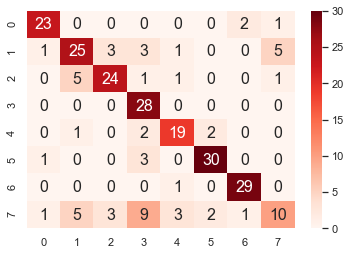

In [31]:
#Parametros de búsqueda
param_grid = {'alpha': [0,0.3,0.6,1],
              'fit_prior':[True,False],
             }
         
#Creación del modelo
clfrNB = naive_bayes.MultinomialNB()

#Evaluación del modelo con la métrica f1_weighted. Usa todos los recursos de la computadora
clf = GridSearchCV(clfrNB, param_grid, scoring = 'f1_weighted',n_jobs = -1)

#Ajuste del modelo a los datos de entrada. Descomentar el preprocesado que desea emplear
#clf.fit(X_trainCVRO, y_trainCVRO)
#clf.fit(X_trainCVSM, y_trainCVSM)
#clf.fit(X_trainTfRO, y_trainTfRO)
clf.fit(X_trainTfSM, y_trainTfSM)

#Salida por pantalla de los resultados
print("Mejores parámetros encontrados sobre el conjunto de entrenamiento:")
print()
print(clf.best_params_)
print()
print("Puntuación sobre el conjunto de entrenamiento:")
print()
print(clf.cv_results_['mean_test_score']) 
print(clf.cv_results_['std_test_score'])
print()

#Finalmente extraemos los resultados con nuestro set de test
print("Memoria detallada de los resultados")
print()
print("El modelo ha sido entrenado con todo el conjunto de entrenamiento")
print("Los resultados que obtiene con el conjunto de evaluación son los siguientes")
print()

#Evaluación de la predicción del modelo. Descomentar en función del preprocesado empleado
#y_testCVRO, y_predCVRO = y_testCVRO, clf.predict(X_testCVRO)
#print(classification_report(y_testCVRO, y_predCVRO))
#y_testCVSM, y_predCVSM = y_testCVSM, clf.predict(X_testCVSM)
#print(classification_report(y_testCVSM, y_predCVSM))
#y_testTfRO, y_predTfRO = y_testTfRO, clf.predict(X_testTfRO)
#print(classification_report(y_testTfRO, y_predTfRO))
y_testTfSM, y_predTfSM = y_testTfSM, clf.predict(X_testTfSM)
print(classification_report(y_testTfSM, y_predTfSM))

#Construcción de la matriz de confusión
#Descomentar en función del preprocesado empleado
#array = confusion_matrix(y_testCVRO, y_predCVRO)
#array = confusion_matrix(y_testCVSM, y_predCVSM)
#array = confusion_matrix(y_testTfRO, y_predTfRO)
array = confusion_matrix(y_testTfSM, y_predTfSM)
df_cm = pd.DataFrame(array)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap = 'Reds')) 

#Descomentar si se desean guardar los resultados en un excel
#writer = pd.ExcelWriter('Resultados-MNB.xlsx')
#infoNN = pd.DataFrame(clf.cv_results_)
#infoNN.to_excel(writer)
#writer.save()

#Descomentar si se desea salvar el modelo 
#modelMNB = clf.best_estimator_
#filename = 'modelMNB.model'
#pickle.dump(modelMNB, open(filename, 'wb'))

Mejores parámetros encontrados sobre el conjunto de entrenamiento:

{'alpha': 0.6, 'fit_prior': True, 'norm': False}

Puntuación sobre el conjunto de entrenamiento:

[0.53336701 0.65728464 0.53336701 0.65728464 0.65424097 0.66844756
 0.65424097 0.66844756 0.6586015  0.67015967 0.6586015  0.67015967
 0.65712287 0.66291444 0.65712287 0.66291444]
[0.03746538 0.04025789 0.03746538 0.04025789 0.05025555 0.0411739
 0.05025555 0.0411739  0.05025749 0.04876099 0.05025749 0.04876099
 0.05405198 0.05002353 0.05405198 0.05002353]

Memoria detallada de los resultados

El modelo ha sido entrenado con todo el conjunto de entrenamiento
Los resultados que obtiene con el conjunto de evaluación son los siguientes

              precision    recall  f1-score   support

           1       0.67      0.85      0.75        26
           2       0.71      0.45      0.55        38
           3       0.58      0.88      0.70        32
           4       0.57      0.86      0.69        28
           5       0.71

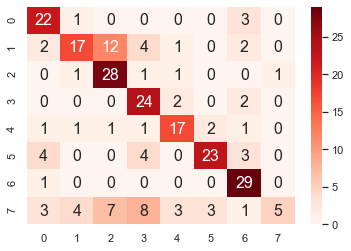

In [32]:
#Parametros de búsqueda
param_grid = {'alpha': [0,0.3,0.6,1],
              'fit_prior':[True,False],
              'norm':[True,False],
             }

#Creación del modelo
clfrcNB = naive_bayes.ComplementNB()

#Evaluación del modelo con la métrica f1_weighted. Usa todos los recursos de la computadora
clf = GridSearchCV(clfrcNB, param_grid, scoring = 'f1_weighted',n_jobs = -1)

#Ajuste del modelo a los datos de entrada. Descomentar el preprocesado que desea emplear
#clf.fit(X_trainCVRO, y_trainCVRO)
#clf.fit(X_trainCVSM, y_trainCVSM)
#clf.fit(X_trainTfRO, y_trainTfRO)
clf.fit(X_trainTfSM, y_trainTfSM)

#Salida por pantalla de los resultados
print("Mejores parámetros encontrados sobre el conjunto de entrenamiento:")
print()
print(clf.best_params_)
print()
print("Puntuación sobre el conjunto de entrenamiento:")
print()
print(clf.cv_results_['mean_test_score']) 
print(clf.cv_results_['std_test_score'])
print()

#Finalmente extraemos los resultados con nuestro set de test
print("Memoria detallada de los resultados")
print()
print("El modelo ha sido entrenado con todo el conjunto de entrenamiento")
print("Los resultados que obtiene con el conjunto de evaluación son los siguientes")
print()

#Evaluación de la predicción del modelo. Descomentar en función del preprocesado empleado
#y_testCVRO, y_predCVRO = y_testCVRO, clf.predict(X_testCVRO)
#print(classification_report(y_testCVRO, y_predCVRO))
#y_testCVSM, y_predCVSM = y_testCVSM, clf.predict(X_testCVSM)
#print(classification_report(y_testCVSM, y_predCVSM))
#y_testTfRO, y_predTfRO = y_testTfRO, clf.predict(X_testTfRO)
#print(classification_report(y_testTfRO, y_predTfRO))
y_testTfSM, y_predTfSM = y_testTfSM, clf.predict(X_testTfSM)
print(classification_report(y_testTfSM, y_predTfSM))

#Construcción de la matriz de confusión
#Descomentar en función del preprocesado empleado
#array = confusion_matrix(y_testCVRO, y_predCVRO)
#array = confusion_matrix(y_testCVSM, y_predCVSM)
#array = confusion_matrix(y_testTfRO, y_predTfRO)
array = confusion_matrix(y_testTfSM, y_predTfSM)
df_cm = pd.DataFrame(array)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap = 'Reds')) 

#Descomentar si se desean guardar los resultados en un excel
#writer = pd.ExcelWriter('Resultados-CNB.xlsx')
#infoNN = pd.DataFrame(clf.cv_results_)
#infoNN.to_excel(writer)
#writer.save()

#Descomentar si se desea salvar el modelo 
#modelCNB = clf.best_estimator_
#filename = 'modelCNB.model'
#pickle.dump(modelCNB, open(filename, 'wb'))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Mejores parámetros encontrados sobre el conjunto de entrenamiento:

{'C': 100, 'class_weight': 'balanced', 'fit_intercept': True, 'multi_class': 'ovr', 'solver': 'saga', 'tol': 0.0001, 'warm_start': False}

Puntuación sobre el conjunto de entrenamiento:

[0.70129415 0.70129415 0.70129415 0.70129415 0.70129415 0.70129415
 0.70129415 0.70129415 0.70129415 0.70129415 0.70129415 0.70129415
 0.70129415 0.70129415 0.70129415 0.70129415 0.68442629 0.68442629
 0.68442629 0.68442629 0.68442629 0.68442629 0.68442629 0.68442629
 0.70129415 0.70129415 0.70129415 0.70129415 0.70129415 0.70129415
 0.70129415 0.70129415 0.69711812 0.70119469 0.70129415 0.69974119
 0.70129415 0.70129415 0.70129415 0.69974119 0.72942855 0.72942855
 0.72942855 0.72942855 0.72942855 0.72942855 0.72942855 0.72942855
 0.72942855 0.72942855 0.72942855 0.72942855 0.72942855 0.72942855
 0.72942855 0.72942855 0.68442629 0.68442629 0.68442629 0.68442629
 0.68442629 0.68442629 0.68442629 0.68442629 0.72942855 0.72942855
 0.72942

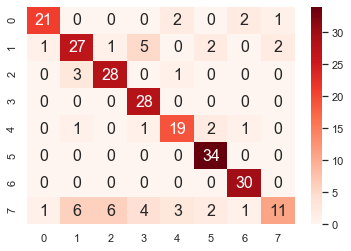

In [33]:
#Parametros de búsqueda
param_grid = {'tol': [0.0001,0.00001,0.000001,0.0000001],
              'C': [1,10,100],
              'fit_intercept':[True,False],
              'class_weight':['balanced',None],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'multi_class':['auto', 'ovr'],
              'warm_start':[True,False]}

#Creación del modelo
modelLR = LogisticRegression()

#Evaluación del modelo con la métrica f1_weighted. Usa todos los recursos de la computadora
clf = GridSearchCV(modelLR, param_grid, scoring = 'f1_weighted',n_jobs = -1)

#Ajuste del modelo a los datos de entrada. Descomentar el preprocesado que desea emplear
#clf.fit(X_trainCVRO, y_trainCVRO)
#clf.fit(X_trainCVSM, y_trainCVSM)
#clf.fit(X_trainTfRO, y_trainTfRO)
clf.fit(X_trainTfSM, y_trainTfSM)

#Salida por pantalla de los resultados
print("Mejores parámetros encontrados sobre el conjunto de entrenamiento:")
print()
print(clf.best_params_)
print()
print("Puntuación sobre el conjunto de entrenamiento:")
print()
print(clf.cv_results_['mean_test_score']) 
print(clf.cv_results_['std_test_score'])
print()

#Finalmente extraemos los resultados con nuestro set de test
print("Memoria detallada de los resultados")
print()
print("El modelo ha sido entrenado con todo el conjunto de entrenamiento")
print("Los resultados que obtiene con el conjunto de evaluación son los siguientes")
print()

#Evaluación de la predicción del modelo. Descomentar en función del preprocesado empleado
#y_testCVRO, y_predCVRO = y_testCVRO, clf.predict(X_testCVRO)
#print(classification_report(y_testCVRO, y_predCVRO))
#y_testCVSM, y_predCVSM = y_testCVSM, clf.predict(X_testCVSM)
#print(classification_report(y_testCVSM, y_predCVSM))
#y_testTfRO, y_predTfRO = y_testTfRO, clf.predict(X_testTfRO)
#print(classification_report(y_testTfRO, y_predTfRO))
y_testTfSM, y_predTfSM = y_testTfSM, clf.predict(X_testTfSM)
print(classification_report(y_testTfSM, y_predTfSM))

#Construcción de la matriz de confusión
#Descomentar en función del preprocesado empleado
#array = confusion_matrix(y_testCVRO, y_predCVRO)
#array = confusion_matrix(y_testCVSM, y_predCVSM)
#array = confusion_matrix(y_testTfRO, y_predTfRO)
array = confusion_matrix(y_testTfSM, y_predTfSM)
df_cm = pd.DataFrame(array)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap = 'Reds')) 

#Descomentar si se desean guardar los resultados en un excel
#writer = pd.ExcelWriter('Resultados-LR.xlsx')
#infoNN = pd.DataFrame(clf.cv_results_)
#infoNN.to_excel(writer)
#writer.save()

#Descomentar si se desea salvar el modelo 
#modelLR = clf.best_estimator_
#filename = 'modelLR.model'
#pickle.dump(modelLR, open(filename, 'wb'))

Mejores parámetros encontrados sobre el conjunto de entrenamiento:

{'C': 1, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'shrinking': True, 'tol': 0.01}

Puntuación sobre el conjunto de entrenamiento:

[0.3556176  0.3556176  0.3556176  ... 0.03174014 0.03174014 0.03174014]
[0.02765895 0.02765895 0.02765895 ... 0.00108802 0.00108802 0.00108802]

Memoria detallada de los resultados

El modelo ha sido entrenado con todo el conjunto de entrenamiento
Los resultados que obtiene con el conjunto de evaluación son los siguientes

              precision    recall  f1-score   support

           1       0.96      0.85      0.90        26
           2       0.73      0.63      0.68        38
           3       0.78      0.91      0.84        32
           4       0.82      1.00      0.90        28
           5       0.95      0.79      0.86        24
           6       0.89      1.00      0.94        34
           7       0.94      1.00  

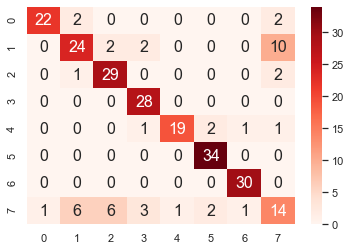

In [34]:
#Parametros de búsqueda
param_grid = {'C': [0.1,0.4,0.7,1],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'degree':[1,2,3,4,5],
              'gamma':['scale', 'auto'],
              'shrinking':[True,False],
              'tol':[0.01,0.001,0.0001],
              'decision_function_shape':['ovo','ovr'],
              'probability':[True]
             }

#Creación del modelo
svc = svm.SVC()

#Evaluación del modelo con la métrica f1_weighted. Usa todos los recursos de la computadora
clf = GridSearchCV(svc, param_grid, scoring = 'f1_weighted',n_jobs = -1)

#Ajuste del modelo a los datos de entrada. Descomentar el preprocesado que desea emplear
#clf.fit(X_trainCVRO, y_trainCVRO)
#clf.fit(X_trainCVSM, y_trainCVSM)
#clf.fit(X_trainTfRO, y_trainTfRO)
clf.fit(X_trainTfSM, y_trainTfSM)

#Salida por pantalla de los resultados
print("Mejores parámetros encontrados sobre el conjunto de entrenamiento:")
print()
print(clf.best_params_)
print()
print("Puntuación sobre el conjunto de entrenamiento:")
print()
print(clf.cv_results_['mean_test_score']) 
print(clf.cv_results_['std_test_score'])
print()

#Finalmente extraemos los resultados con nuestro set de test
print("Memoria detallada de los resultados")
print()
print("El modelo ha sido entrenado con todo el conjunto de entrenamiento")
print("Los resultados que obtiene con el conjunto de evaluación son los siguientes")
print()

#Evaluación de la predicción del modelo. Descomentar en función del preprocesado empleado
#y_testCVRO, y_predCVRO = y_testCVRO, clf.predict(X_testCVRO)
#print(classification_report(y_testCVRO, y_predCVRO))
#y_testCVSM, y_predCVSM = y_testCVSM, clf.predict(X_testCVSM)
#print(classification_report(y_testCVSM, y_predCVSM))
#y_testTfRO, y_predTfRO = y_testTfRO, clf.predict(X_testTfRO)
#print(classification_report(y_testTfRO, y_predTfRO))
y_testTfSM, y_predTfSM = y_testTfSM, clf.predict(X_testTfSM)
print(classification_report(y_testTfSM, y_predTfSM))

#Construcción de la matriz de confusión
#Descomentar en función del preprocesado empleado
#array = confusion_matrix(y_testCVRO, y_predCVRO)
#array = confusion_matrix(y_testCVSM, y_predCVSM)
#array = confusion_matrix(y_testTfRO, y_predTfRO)
array = confusion_matrix(y_testTfSM, y_predTfSM)
df_cm = pd.DataFrame(array)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap = 'Reds')) 

#Descomentar si se desean guardar los resultados en un excel
#writer = pd.ExcelWriter('Resultados-svc.xlsx')
#infoNN = pd.DataFrame(clf.cv_results_)
#infoNN.to_excel(writer)
#writer.save()

#Descomentar si se desea salvar el modelo 
#modelsvc = clf.best_estimator_
#filename = 'modelsvc.model'
#pickle.dump(modelsvc, open(filename, 'wb'))

/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Mejores parámetros encontrados sobre el conjunto de entrenamiento:

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50, 'oob_score': False}

Puntuación sobre el conjunto de entrenamiento:

[       nan        nan        nan ... 0.77069813        nan 0.76508125]
[      nan       nan       nan ... 0.0364214       nan 0.048683 ]

Memoria detallada de los resultados

El modelo ha sido entrenado con todo el conjunto de entrenamiento
Los resultados que obtiene con el conjunto de evaluación son los siguientes

              precision    recall  f1-score   support

           1       0.95      0.81      0.88        26
           2       0.80      0.53      0.63        38
           3       0.67      0.91      0.77        32
           4       0.72      0.93      0.81        28
           5       0.95      0.79      0.86        24
           6       0.85      1.00      0.92        34
           7       0.77      1.00 

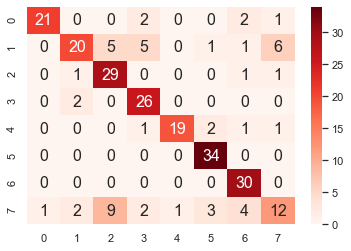

In [35]:
#Parametros de búsqueda
param_grid = {'n_estimators': [25,50,100,200,500],
              'criterion':['gini', 'entropy'],
              'max_depth':[10,20,50,None],
              'min_samples_split':[1,2,3,4,5],
              'min_samples_leaf':[0,0.3,0.6,1],
              'bootstrap':[True,False],
              'oob_score':[True,False],
             }

#Creación del modelo
modelRF = RandomForestClassifier()

#Evaluación del modelo con la métrica f1_weighted. Usa todos los recursos de la computadora
clf = GridSearchCV(modelRF, param_grid, scoring = 'f1_weighted',n_jobs = -1)

#Ajuste del modelo a los datos de entrada. Descomentar el preprocesado que desea emplear
#clf.fit(X_trainCVRO, y_trainCVRO)
#clf.fit(X_trainCVSM, y_trainCVSM)
#clf.fit(X_trainTfRO, y_trainTfRO)
clf.fit(X_trainTfSM, y_trainTfSM)

#Salida por pantalla de los resultados
print("Mejores parámetros encontrados sobre el conjunto de entrenamiento:")
print()
print(clf.best_params_)
print()
print("Puntuación sobre el conjunto de entrenamiento:")
print()
print(clf.cv_results_['mean_test_score']) 
print(clf.cv_results_['std_test_score'])
print()

#Finalmente extraemos los resultados con nuestro set de test
print("Memoria detallada de los resultados")
print()
print("El modelo ha sido entrenado con todo el conjunto de entrenamiento")
print("Los resultados que obtiene con el conjunto de evaluación son los siguientes")
print()

#Evaluación de la predicción del modelo. Descomentar en función del preprocesado empleado
#y_testCVRO, y_predCVRO = y_testCVRO, clf.predict(X_testCVRO)
#print(classification_report(y_testCVRO, y_predCVRO))
#y_testCVSM, y_predCVSM = y_testCVSM, clf.predict(X_testCVSM)
#print(classification_report(y_testCVSM, y_predCVSM))
#y_testTfRO, y_predTfRO = y_testTfRO, clf.predict(X_testTfRO)
#print(classification_report(y_testTfRO, y_predTfRO))
y_testTfSM, y_predTfSM = y_testTfSM, clf.predict(X_testTfSM)
print(classification_report(y_testTfSM, y_predTfSM))

#Construcción de la matriz de confusión
#Descomentar en función del preprocesado empleado
#array = confusion_matrix(y_testCVRO, y_predCVRO)
#array = confusion_matrix(y_testCVSM, y_predCVSM)
#array = confusion_matrix(y_testTfRO, y_predTfRO)
array = confusion_matrix(y_testTfSM, y_predTfSM)
df_cm = pd.DataFrame(array)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap = 'Reds')) 

#Descomentar si se desean guardar los resultados en un excel
#writer = pd.ExcelWriter('Resultados-RF.xlsx')
#infoNN = pd.DataFrame(clf.cv_results_)
#infoNN.to_excel(writer)
#writer.save()

#Descomentar si se desea salvar el modelo 
#modelRF = clf.best_estimator_
#filename = 'modelRF.model'
#pickle.dump(modelRF, open(filename, 'wb'))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Mejores parámetros encontrados sobre el conjunto de entrenamiento:

{'activation': 'tanh', 'early_stopping': False, 'learning_rate': 'adaptive', 'shuffle': True, 'solver': 'lbfgs', 'tol': 1e-05, 'warm_start': True}

Puntuación sobre el conjunto de entrenamiento:

[0.75303421 0.75386894 0.76418621 0.75144696 0.74772326 0.75039987
 0.06970043 0.10263212 0.06250269 0.06069303 0.08255811 0.04545103
 0.6771713  0.66116596 0.67872893 0.68010121 0.69629375 0.66770763
 0.75539715 0.75476615 0.75460267 0.75407902 0.75377748 0.74515264
 0.06517303 0.05735157 0.07724258 0.06648473 0.08157586 0.09709661
 0.66251848 0.68130065 0.71863132 0.69615615 0.66436163 0.6654832
 0.75892866 0.75358846 0.75023192 0.7417738  0.7578669  0.75692291
 0.06982393 0.07477765 0.06683186 0.05213511 0.07259739 0.06496856
 0.67392757 0.67567707 0.66926501 0.67989124 0.70318396 0.68892691
 0.75762024 0.76040415 0.75872787 0.74797817 0.74812104 0.75152202
 0.05849194 0.07319708 0.07553494 0.0556228  0.05678762 0.0677515
 

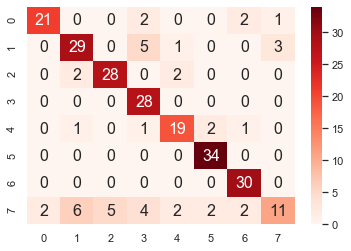

In [36]:
#Parametros de búsqueda
param_grid = {'activation': ['identity','logistic','tanh','relu'],
              'solver':['lbfgs','sgd','adam'],
              'learning_rate':['adaptive', 'constant', 'invscaling'],
              'shuffle':[True,False],
              'warm_start':[True,False],
              'tol':[0.0001,0.00001,0.000001],
              'early_stopping':[True,False],
             }

#Creación del modelo
modelNN = MLPClassifier()

#Evaluación del modelo con la métrica f1_weighted. Usa todos los recursos de la computadora
clf = GridSearchCV(modelNN, param_grid, scoring = 'f1_weighted',n_jobs = -1)

#Ajuste del modelo a los datos de entrada. Descomentar el preprocesado que desea emplear
#clf.fit(X_trainCVRO, y_trainCVRO)
#clf.fit(X_trainCVSM, y_trainCVSM)
#clf.fit(X_trainTfRO, y_trainTfRO)
clf.fit(X_trainTfSM, y_trainTfSM)

#Salida por pantalla de los resultados
print("Mejores parámetros encontrados sobre el conjunto de entrenamiento:")
print()
print(clf.best_params_)
print()
print("Puntuación sobre el conjunto de entrenamiento:")
print()
print(clf.cv_results_['mean_test_score']) 
print(clf.cv_results_['std_test_score'])
print()

#Finalmente extraemos los resultados con nuestro set de test
print("Memoria detallada de los resultados")
print()
print("El modelo ha sido entrenado con todo el conjunto de entrenamiento")
print("Los resultados que obtiene con el conjunto de evaluación son los siguientes")
print()

#Evaluación de la predicción del modelo. Descomentar en función del preprocesado empleado
#y_testCVRO, y_predCVRO = y_testCVRO, clf.predict(X_testCVRO)
#print(classification_report(y_testCVRO, y_predCVRO))
#y_testCVSM, y_predCVSM = y_testCVSM, clf.predict(X_testCVSM)
#print(classification_report(y_testCVSM, y_predCVSM))
#y_testTfRO, y_predTfRO = y_testTfRO, clf.predict(X_testTfRO)
#print(classification_report(y_testTfRO, y_predTfRO))
y_testTfSM, y_predTfSM = y_testTfSM, clf.predict(X_testTfSM)
print(classification_report(y_testTfSM, y_predTfSM))

#Construcción de la matriz de confusión
#Descomentar en función del preprocesado empleado
#array = confusion_matrix(y_testCVRO, y_predCVRO)
#array = confusion_matrix(y_testCVSM, y_predCVSM)
#array = confusion_matrix(y_testTfRO, y_predTfRO)
array = confusion_matrix(y_testTfSM, y_predTfSM)
df_cm = pd.DataFrame(array)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap = 'Reds')) 

#Descomentar si se desean guardar los resultados en un excel
#writer = pd.ExcelWriter('Resultados-NN.xlsx')
#infoNN = pd.DataFrame(clf.cv_results_)
#infoNN.to_excel(writer)
#writer.save()

#Descomentar si se desea salvar el modelo 
#modelNN = clf.best_estimator_
#filename = 'modelNN.model'
#pickle.dump(modelNN, open(filename, 'wb'))

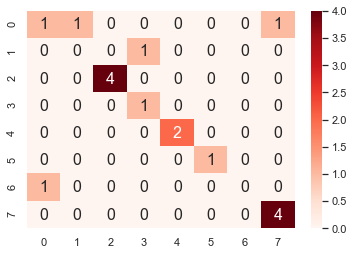

0.7307189542483661

In [5]:
y1 = [8,8,1,8,8,1,1,2,3,3,3,3,4,6,6,6,5,5]
y2 = [1,8,1,8,7,7,1,5,3,3,3,3,5,8,7,8,5,1]
y3 = [8,8,2,1,8,8,1,3,3,3,3,4,6,6,5,5,7]
y4 = [8,8,8,8,1,8,1,3,3,3,3,5,4,5,5,5,8]
y5 = [8,8,1,8,8,1,1,2,3,3,3,3,4,6,5,5,7]
y6 = [8,8,1,8,8,8,2,4,3,3,3,3,4,6,5,5,1]
array = confusion_matrix(y5, y6)
df_cm = pd.DataFrame(array)

#Representación de la matriz de confusión
sn.set(font_scale=1)
plt.show(sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap = 'Reds')) 

f1_score(y5,y6,average = 'weighted')

In [7]:
import scipy.stats as stats

y9 = [0.93,0.93,0.91,0.90,0.92,0.92] #Valores obtenidos con HMM
y10 = [0.80,0.84,0.80,0.84,0.80,0.84] #Valores obtenidos con solo SVC

stats.f_oneway(y9,y10)

F_onewayResult(statistic=94.08108108108135, pvalue=2.100864209822441e-06)